# Lab 01 AB

## Goal: classify movies as either good or bad with the hopes of eventually tailoring it to a user profile. This would allow us to efficiently determine a set of movies that a user may watch vs won't watch. 

## Data Evaluation
- movies.csv contains ~2k movies sourced from TMDB public dataset. This is a sample of the data from a personal project of mine. 
- a known limitation: data is biased toward more popular movies so it has a class imbalance which will affect the quality of our classification. 

### Usable Features (Known before movie release):
- budget (Numeric): does high budget lead to reviews? 
- runtime (Numeric): are longer movies generally better? 
- genres (Categorical $\rightarrow$ One-Hot): horror, action, drama, romance ...
- production_companies (Categorical): pixar, disney, ...
- release_month (Temporal): seasonal timing
- release_year (Temporal)
- overview (Text -> TF-IDF): plot depth
- tagline (Text -> TF-IDF): marketing tone 
- keywords (Text -> Count + TF-IDF): specific topics
- status (Categorical): released, post production

### Leaky Featues
- revenue (Leakage: box office correlates with popularity)
- vote_count (Leakage: popularity proxy)
- popularity (Leakage)
- adult (Useless: all values are False).
- original_language (Useless: all are en)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("movies.csv")
df.head()

,id,imdb_id,original_title,adult,backdrop_path,budget,homepage,original_language,overview,popularity,...,vote_count,collection_id,collection_name,origin_country,genres,genre_ids,production_companies,production_countries,spoken_languages,keywords
0,1228246,tt30274401,Five Nights at Freddy's 2,False,/54BOXpX2ieTXMDzHymdDMnUIzYG.jpg,36000000,https://www.fivenightsatfreddys.movie,en,One year since the supernatural nightmare at F...,381.5918,...,355,1240438.0,Five Nights at Freddy's Collection,US,Horror|Thriller,27|53,Blumhouse Productions|Scott Cawthon Production...,United States of America,English,killer robot|pizzeria|sequel|serial killer|sec...
1,813,tt0080339,Airplane!,False,/lz6Cy1JgOR72AilU2ghDvLKbgqT.jpg,3500000,NaN,en,An ex-fighter pilot forced to take over the co...,12.1936,...,4880,91663.0,Airplane Collection,US,Comedy,35,Paramount Pictures|Howard W. Koch Productions,United States of America,English,"chicago, illinois|post-traumatic stress disord..."
2,1891,tt0080684,The Empire Strikes Back,False,/aJCtkxLLzkk1pECehVjKHA2lBgw.jpg,18000000,http://www.starwars.com/films/star-wars-episod...,en,"The epic saga continues as Luke Skywalker, in ...",8.5016,...,17951,10.0,Star Wars Collection,US,Adventure|Action|Science Fiction,12|28|878,Lucasfilm Ltd.,United States of America,English,rebellion|android|spacecraft|asteroid|rebel|sp...
3,694,tt0081505,The Shining,False,/mmd1HnuvAzFc4iuVJcnBrhDNEKr.jpg,19000000,https://www.warnerbros.com/movies/shining,en,Jack Torrance accepts a caretaker job at the O...,13.7163,...,18468,530064.0,The Shining Collection,US,Horror|Thriller,27|53,Warner Bros. Pictures|Peregrine|Hawk Films|The...,United Kingdom|United States of America,English,hotel|new year's eve|child abuse|based on nove...
4,4488,tt0080761,Friday the 13th,False,/16zzKM5vDxnYiqG6Tg6wOkOLSmj.jpg,550000,NaN,en,Camp counselors are stalked and murdered by an...,6.6688,...,3213,9735.0,Friday the 13th Collection,US,Horror,27,Sean S. Cunningham Films|Georgetown Productions,United States of America,English,lake|new jersey|drowning|summer camp|sadism|vi...


## Data Quality Audit

In [34]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
print(missing_pct[missing_pct > 0].sort_values(ascending=False).to_string())

collection_id           60.8
collection_name         60.8
homepage                41.2
tagline                  2.9
keywords                 1.3
backdrop_path            0.4
origin_country           0.2
production_companies     0.2
production_countries     0.2


In [35]:
print(f"Exact duplicates: {df.duplicated().sum()}")
print(f"Duplicate IDs: {df['id'].duplicated().sum()}")
print(f"Duplicate titles: {df['title'].duplicated().sum()} (remakes OK)")

Exact duplicates: 0
Duplicate IDs: 0
Duplicate titles: 36 (remakes OK)


count    2199.00
mean        6.78
std         0.84
min         1.00
25%         6.32
50%         6.84
75%         7.34
max         8.70
Name: vote_average, dtype: float64

Skew: -0.97


<Axes: >

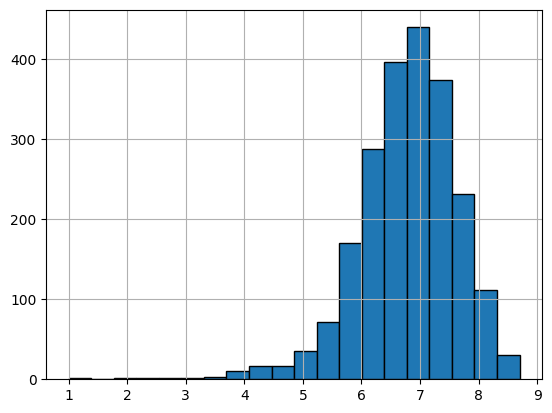

In [36]:
print(df['vote_average'].describe().round(2))
print(f"\nSkew: {df['vote_average'].skew():.2f}")
df['vote_average'].hist(bins=20, edgecolor='black')

### Bias
**Budget-quality correlation**: High-budget films have more votes/metadata. Models may underperform on smaller films, especially as our dataset distribution may be biased toward these larger movies.